In [116]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [117]:
path2classic = "/home/lambda/code/synth_spectrum/data/Test_spectrum.syn"
path2low = "/home/lambda/code/synth_spectrum/data/Test_spectrum_bad.syn"
path2med = "/home/lambda/code/synth_spectrum/data/Test_spectrum_med.syn"


In [118]:
def extract_data(path):
    data = np.genfromtxt(path)
    ang = data[:, 0]
    red_flux = data[:, 1]
    cont = data[:, 3]
    ang.astype(float)
    return ang, red_flux, cont

In [119]:
ang, flux, _ = extract_data(path2classic)
ang_low, flux_low, _ = extract_data(path2low)
ang_med, flux_med, _ = extract_data(path2med)

In [120]:
# So much data, need to small window
# from 6000 angs to 6100
start = 6000
end = 6100
index_start = np.where(ang==start)[0][0]
index_end = np.where(ang==end)[0][0]
index_start_low = np.where(ang_low==start)[0][0]
index_end_low = np.where(ang_low==end)[0][0]
index_start_med = np.where(ang_med==start)[0][0]
index_end_med = np.where(ang_med==end)[0][0]

In [121]:
ang = ang[index_start:index_end]
ang_low = ang_low[index_start_low:index_end_low]
ang_med = ang_med[index_start_med:index_end_med]

flux = flux[index_start:index_end]
flux_low = flux_low[index_start_low:index_end_low]
flux_med = flux_med[index_start_med:index_end_med]
print(f"From {start} to {end} Ang \n"
      f"spectrum 1 {len(ang)} p \n"
      f"spectrum 2 {len(ang_med)} p \n"
      f"spectrum 3 {len(ang_low)} p")

From 6000 to 6100 Ang 
spectrum 1 10000 p 
spectrum 2 1000 p 
spectrum 3 100 p


In [122]:
from scipy.interpolate import CubicSpline
from scipy.interpolate import Akima1DInterpolator
from scipy.interpolate import PchipInterpolator

In [123]:
y_cubicBC_norm = CubicSpline(ang, flux, bc_type="natural")
y_cubicBC_med = CubicSpline(ang_med, flux_med, bc_type="natural")
y_cubicBC_low = CubicSpline(ang_low, flux_low, bc_type="natural")

y_akima_norm = Akima1DInterpolator(ang, flux)
y_akima_med = Akima1DInterpolator(ang_med, flux_med)
y_akima_low = Akima1DInterpolator(ang_low, flux_low)

y_cubicMT_norm = PchipInterpolator(ang, flux)
y_cubicMT_med = PchipInterpolator(ang_med, flux_med)
y_cubicMT_low = PchipInterpolator(ang_low, flux_low)

ang_int_norm = np.linspace(np.min(ang), np.max(ang), len(ang) * 10)
ang_int_med = np.linspace(np.min(ang_med), np.max(ang_med), len(ang_med) * 10)
ang_int_low = np.linspace(np.min(ang_low), np.max(ang_low), len(ang_low) * 10)


In [124]:
# plt.scatter(ang, flux, color="black")
# plt.plot(ang_int_norm, y_cubicBC_norm(ang_int_norm), label="Cubic")
# plt.plot(ang_int_norm, y_cubicMT_norm(ang_int_norm), label="CubicMT")
# plt.plot(ang_int_norm, y_akima_norm(ang_int_norm), label="Akima")
# plt.legend()

In [125]:
# plt.scatter(ang_med, flux_med, color="black")
# plt.plot(ang_int_med, y_cubicBC_med(ang_int_med), label="Cubic")
# plt.plot(ang_int_med, y_cubicMT_med(ang_int_med), label="CubicMT")
# plt.plot(ang_int_med, y_akima_med(ang_int_med), label="Akima")
# plt.legend()

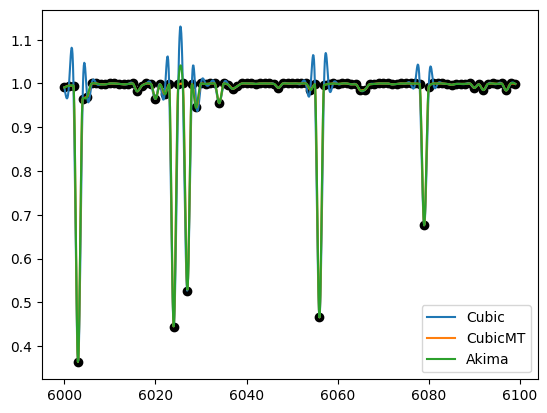

In [126]:
plt.scatter(ang_low, flux_low, color="black")
plt.plot(ang_int_low, y_cubicBC_low(ang_int_low), label="Cubic")
plt.plot(ang_int_low, y_cubicMT_low(ang_int_low), label="CubicMT")
plt.plot(ang_int_low, y_akima_low(ang_int_low), label="Akima")
plt.legend()
plt.show()

In [127]:
# delta_arr_akima = [flux[x] - y_akima_med(ang)[x] for x in range(len(ang))]

In [128]:
delta_arr = []
delta_med = []
delta_low = []
delta_arr_c = []
delta_med_c = []
delta_low_c = []

for i in range(len(flux)):
    delta_arr.append(flux[i] - y_akima_norm(ang)[i])
    delta_med.append(flux[i] - y_akima_med(ang)[i])
    delta_low.append(flux[i] - y_akima_low(ang)[i])
    delta_arr_c.append(flux[i] - y_cubicBC_norm (ang)[i])
    delta_med_c.append(flux[i] - y_cubicBC_med(ang)[i])
    delta_low_c.append(flux[i] - y_cubicBC_low(ang)[i])
    print(ang[i])

6000.0
6000.01
6000.02
6000.03
6000.04
6000.05
6000.06
6000.07
6000.08
6000.09
6000.1
6000.11
6000.12
6000.13
6000.14
6000.15
6000.16
6000.17
6000.18
6000.19
6000.2
6000.21
6000.22
6000.23
6000.24
6000.25
6000.26
6000.27
6000.28
6000.29
6000.3
6000.31
6000.32
6000.33
6000.34
6000.35
6000.36
6000.37
6000.38
6000.39
6000.4
6000.41
6000.42
6000.43
6000.44
6000.45
6000.46
6000.47
6000.48
6000.49
6000.5
6000.51
6000.52
6000.53
6000.54
6000.55
6000.56
6000.57
6000.58
6000.59
6000.6
6000.61
6000.62
6000.63
6000.64
6000.65
6000.66
6000.67
6000.68
6000.69
6000.7
6000.71
6000.72
6000.73
6000.74
6000.75
6000.76
6000.77
6000.78
6000.79
6000.8
6000.81
6000.82
6000.83
6000.84
6000.85
6000.86
6000.87
6000.88
6000.89
6000.9
6000.91
6000.92
6000.93
6000.94
6000.95
6000.96
6000.97
6000.98
6000.99
6001.0
6001.01
6001.02
6001.03
6001.04
6001.05
6001.06
6001.07
6001.08
6001.09
6001.1
6001.11
6001.12
6001.13
6001.14
6001.15
6001.16
6001.17
6001.18
6001.19
6001.2
6001.21
6001.22
6001.23
6001.24
6001.25
6001.

In [129]:
print(len(delta_med))

10000


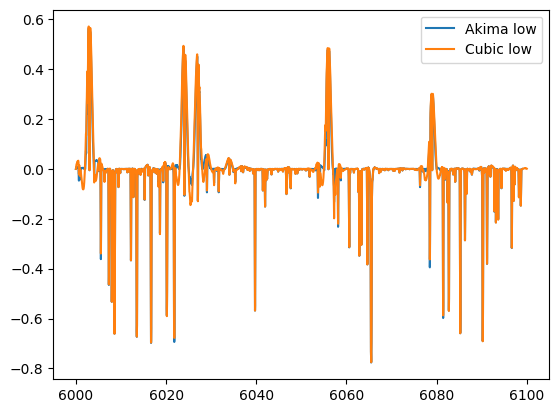

In [130]:
# plt.plot(ang, delta_arr, label="Akima normal")
# plt.plot(ang, delta_med, label="Akima medium")
plt.plot(ang, delta_low, label="Akima low")
# plt.plot(ang, delta_arr_c, label="Cubic normal")
# plt.plot(ang, delta_med_c, label="Cubic medium")
plt.plot(ang, delta_low_c, label="Cubic low")
plt.legend()

In [131]:
akVScub = [delta_low[x] - delta_low_c[x] for x in range(len(ang))]

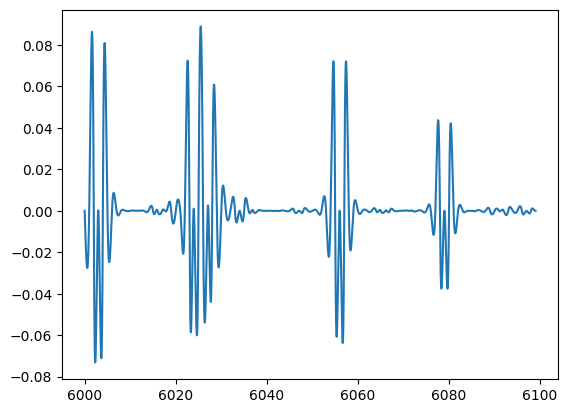

In [132]:
plt.plot(ang, akVScub)

In [133]:
from scipy.interpolate import CubicHermiteSpline

In [134]:
from numpy import diff
dydx = diff(flux_low)/diff(ang_low)
print(len(dydx))
print(len(flux))

99
10000


In [135]:
y_herm_low = CubicHermiteSpline(ang_low[:-1], flux_low[:-1], dydx)

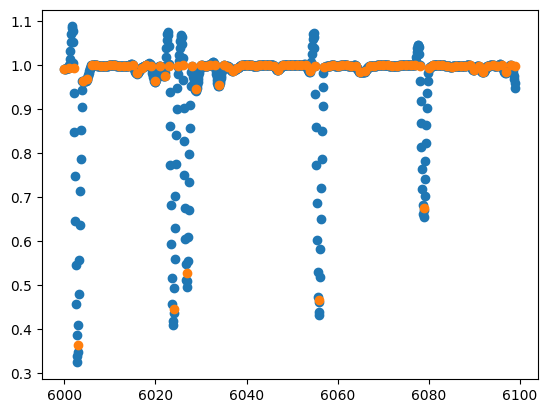

In [138]:
plt.plot (ang_int_low, y_herm_low(ang_int_low))
plt.plot(ang_low, flux_low)

In [143]:
delta_arr_herm = [flux[x] - y_herm_low(ang)[x] for x in range(len(ang))]


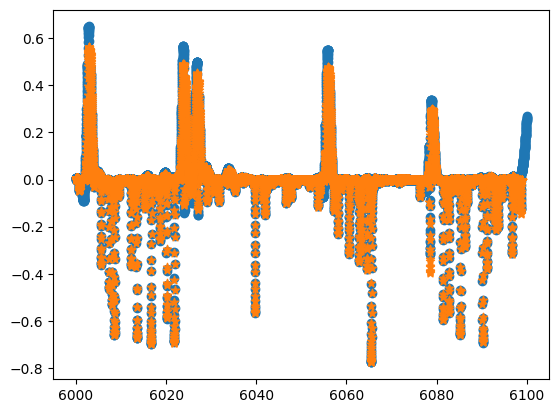

In [149]:
plt.scatter(ang, delta_arr_herm, marker="o")
plt.scatter(ang, delta_low, marker="*")